# Corpus comparisons
Evaluating influence of Hawthorne's presence on the totality of the corpus.

## Mean sentence length
This exemplifies how similar Hawthorne is to the rest of the corpus, as well as his relatively small quantitative impact on it.

In [548]:
import nltk
import random
import statistics
import re
import os
import scipy

### Hawthorne's sentences
For this test, I use the Library of America Hawthorne, as it is better transcribed than Gale.

In [417]:
nh_loa = '/Users/e/code/hawthorne/local/loa_nh/loa_hawthorne_all.txt'

In [164]:
def get_sent_lens(file):
    with open(file) as f:
        text = f.read()
        sents = nltk.tokenize.sent_tokenize(text)
        
    sent_lens = []

    for sent in sents:
        n_toks = len([x for x in re.split('\s+', sent) if x])
        sent_lens.append(n_toks)
    
    return sent_lens

In [165]:
nh_sents = get_sent_lens(nh_loa)

In [166]:
statistics.mean(nh_sents)

23.08811897217661

In [167]:
statistics.quantiles(nh_sents)

[10.0, 20.0, 34.0]

# Hawthorne's peers' sentences
Comparing Hawthorne's sentence lengths against those of his contemporaries:

In [65]:
comparison = '/Users/e/code/hawthorne/local/corpus_no_nh'

In [69]:
files = [os.path.join(comparison, x) for x in os.listdir(comparison) if x.endswith('.txt')]

In [79]:
random.shuffle(files) # randomize sample
sample_size = round(len(files) * 0.1) # get n for 10% sample
sample = files[:sample_size]

In [81]:
sent_lens = []

for i, file in enumerate(sample):
    sent_lens.extend(get_sent_lens(file))
    
    if i % 25 == 0:
        print('\r{} of {}'.format(i, len(sample)), end = '')

275 of 3332

In [82]:
statistics.mean(sent_lens)

26.374018741025175

In [83]:
statistics.quantiles(sent_lens)

[11.0, 21.0, 35.0]

# Word Vectors
I begin by using the [hyperhyper](https://github.com/jfilter/hyperhyper) implementation of the SVD PPMI method of creating word vectors, first of Hawthorne's works.

In [10]:
import hyperhyper as hy

## Hawthorne

In [11]:
nh_corpus = '/Users/e/code/hawthorne/local/gale_nh'

In [131]:
# generate
corpus = hy.Corpus.from_text_files(nh_corpus, preproc_func = hy.tokenize_texts, keep_n = 5000)

texts to ids: 100%|██████████| 23/23 [00:02<00:00, 10.55it/s]


In [132]:
# generate
bunch = hy.Bunch("results/hy_hawthorne", corpus, force_overwrite = True)

In [422]:
# load
bunch = hy.Bunch('results/hy_hawthorne/')

In [423]:
vectors_nh, results_nh = bunch.svd(keyed_vectors = True, subsample = None)

In [424]:
vectors_nh.most_similar('hester')

[('prynne', 0.6416890621185303),
 ('pearl', 0.24967367947101593),
 ('miriam', 0.23768633604049683),
 ('she', 0.22650045156478882),
 ('hibbins', 0.2198188453912735),
 ('thou', 0.19863906502723694),
 ('mistress', 0.19824433326721191),
 ('thyself', 0.19154658913612366),
 ('pit', 0.1914704144001007),
 ('arthur', 0.18614283204078674)]

In [425]:
vectors_nh.most_similar('pearl')

[('child', 0.25472408533096313),
 ('hester', 0.24967367947101593),
 ('mother', 0.2277851104736328),
 ('naughty', 0.19791392982006073),
 ('hannah', 0.1876162588596344),
 ('babe', 0.17599552869796753),
 ('she', 0.17360076308250427),
 ('rigby', 0.1705891191959381),
 ('listened', 0.1696358472108841),
 ('hush', 0.16588468849658966)]

## Gale 1828-1864 including NH

In [151]:
path = '/Users/e/code/hawthorne/local/corpus'

In [644]:
# generate
# corpus = hy.Corpus.from_text_files(path, preproc_func = hy.tokenize_texts, keep_n = 10000)

# load
corpus = hy.Corpus.load('results/corpus_subsample_none/corpus.pkl')

In [646]:
# generate
# bunch = hy.Bunch("results/corpus_subsample_none", corpus, force_overwrite = True)

# load
bunch = hy.Bunch('results/corpus_subsample_none//')

In [647]:
vectors, results = bunch.svd(keyed_vectors = True, subsample = None)

In [648]:
vectors.most_similar('puritan')

[('methodist', 0.3934868574142456),
 ('primitive', 0.3582947552204132),
 ('dutch', 0.35332465171813965),
 ('quaker', 0.33089378476142883),
 ('protestant', 0.3207319974899292),
 ('baptist', 0.3153371214866638),
 ('catholic', 0.3104977011680603),
 ('jewish', 0.24452072381973267),
 ('christian', 0.23519401252269745),
 ('parson', 0.22869554162025452)]

In [727]:
vectors.most_similar('hester')

[('miriam', 0.3072657883167267),
 ('isabel', 0.303394615650177),
 ('christine', 0.29878801107406616),
 ('maud', 0.27142563462257385),
 ('constance', 0.2633606493473053),
 ('marian', 0.26311105489730835),
 ('theresa', 0.25412988662719727),
 ('annie', 0.2525578439235687),
 ('pauline', 0.2524963617324829),
 ('linda', 0.25059691071510315)]

## Gale 1828-1864 excluding NH

In [156]:
path = '/Users/e/code/hawthorne/local/corpus_no_nh'

In [649]:
# generate
# corpus_no_nh = hy.Corpus.from_text_files(path, preproc_func = hy.tokenize_texts, keep_n = 10000)

# load
corpus_no_nh = hy.Corpus.load('results/corpus_no_nh_subsample_none/corpus.pkl')

In [650]:
# generate
# bunch = hy.Bunch("results/corpus_no_nh_subsample_none", corpus, force_overwrite=True)

# load
bunch = hy.Bunch('results/corpus_no_nh_subsample_none//')

In [651]:
vectors_no_nh, results_no_nh = bunch.svd(keyed_vectors = True)

In [652]:
vectors_no_nh.most_similar('puritan')

[('methodist', 0.34290313720703125),
 ('quaker', 0.3168374300003052),
 ('primitive', 0.29920345544815063),
 ('dutch', 0.29672470688819885),
 ('baptist', 0.2812960147857666),
 ('catholic', 0.27922335267066956),
 ('english', 0.2629094123840332),
 ('protestant', 0.2529698610305786),
 ('christian', 0.24499836564064026),
 ('yankee', 0.23915767669677734)]

In [724]:
vectors_no_nh.most_similar('hester')

[('julie', 0.2691107392311096),
 ('christine', 0.2456360012292862),
 ('anna', 0.2245090901851654),
 ('estelle', 0.21444502472877502),
 ('viola', 0.20676776766777039),
 ('julia', 0.20160716772079468),
 ('emma', 0.20148344337940216),
 ('adeline', 0.19821283221244812),
 ('theresa', 0.1944657564163208),
 ('apd', 0.1920011192560196)]

# Comparing vectors across models
In order to compare across models, we take aggregate the differences of the cosine similarities between every vector in the model.

## Differences in cosine similarity
Because SVDs of PPMI are not stochastic, differences between the two models are attributable to the presence or absence of Hawthorne's work.

In [653]:
import pandas as pd
from multiprocessing import Pool
import pickle
import time
import os

In [654]:
def get_vocab(c):
    '''
    Gets vocabulary from hyperhyper corpus object, c.
    '''
    return set([x for x in c.vocab.values()])

In [655]:
def get_shared_vocab(c1, c2):
    '''
    Returns shared vocab between hyperhyper corpus objects.
    '''
    return list(get_vocab(c1) & get_vocab(c2))

In [656]:
def diff_vector(word, v1, v2, vocab = None, topn = 10000, pkl = False):
    '''
    Takes hyperhyper vector objects and returns the difference between those vectors as a dict.
    '''
    # get cosine similarities
    sim1 = v1.most_similar(word, topn = topn)
    sim2 = v2.most_similar(word, topn = topn)

    # calculate differences
    sim1 = pd.Series(data = [x[1] for x in sim1], index = [x[0] for x in sim1])
    sim2 = pd.Series(data = [x[1] for x in sim2], index = [x[0] for x in sim2])
    diff = sim1 - sim2
    total = diff.abs().sum()
    
    # optionally write individual output
    if pkl:
        d = {'word'          : word,
             'abs_diff'      : total,
             'sim1'          : sim1,
             'sim2'          : sim2}
        
        fn = str(round(time.time())) + '_' + word + '.pkl'
        path = os.path.join('results/vec_diffs', fn)
        # write
        with open(path, 'wb') as f:
            pickle.dump(d, f)
            f.close()
        print('\r{} pickled at {}'.format(word, path))
    
    # return observation
    d = {'word'          : word,
         'abs_diff'      : total}

    return d

In [657]:
# linear, takes 5-10 minutes for a vocab of 10k

def diff_vectors(v1, v2, vocab):
    '''
    Takes hyperhyper vector objects (v1, v2), and calculates the absolute difference between them.
    
    Corpus objects (c1, c2) used to extract vocabularies and calculate intersection.
    '''
    
    l = []
    
    for i, word in enumerate(vocab):
        l.append(diff_vector(word, v1, v2))
        if i % 100 == 0:
            pct = round((i / len(vocab)) * 100)
            print('\r{}%'.format(pct), end = '')
    
    # pickle output
    fn = str(round(time.time())) + '_diff_vectors.pkl'
    path = os.path.join('results/vec_diffs', fn)
    
    with open(path, 'wb') as f:
        pickle.dump(l, f)
        f.close()
    print('\rpickle: {}'.format(path))
            
    return l

In [658]:
vocab = get_shared_vocab(corpus, corpus_no_nh)

In [660]:
# generate
diffs = diff_vectors(vectors, vectors_no_nh, vocab)

pickle: results/vec_diffs/1605914440_diff_vectors.pkl


# Create a table of results

In [664]:
# load
diffs = pickle.load(open('/Users/e/code/hawthorne/results/vec_diffs/1605914440_diff_vectors.pkl', 'rb'))

In [665]:
df = pd.DataFrame(diffs)

In [668]:
df['abs_diff'].describe()

count    9985.000000
mean      213.882300
std        27.214233
min       119.660099
25%       194.109672
50%       211.449624
75%       232.322910
max       350.309245
Name: abs_diff, dtype: float64

In [669]:
# Add corpus raw frequency to output
d = {v : corpus.counts[k] for k,v in corpus.vocab.items()}
e = {v : corpus_no_nh.counts[k] for k,v in corpus_no_nh.vocab.items()}

In [671]:
# Make pandas objects
ds = pd.Series(d)
ds.name = '# Gale'
es = pd.Series(e)
es.name = '# Gale - NH'

In [672]:
counts = pd.merge(ds, es, left_on = ds.index, right_on = es.index)

In [674]:
counts.rename(columns = {'key_0':'word'}, inplace=True)

In [676]:
df = pd.merge(df, counts, on = 'word').set_index('word')

In [677]:
df.head()

,abs_diff,# Gale,# Gale - NH
word,,,
twice,234.924290,11751,11694
muscle,206.839319,2026,2021
idiot,226.529023,1520,1509
trio,223.319823,1318,1317
again,230.995042,194486,193522


Hawthorne accounts for about 1 million words (`1062724`) in the model:

In [300]:
nh_n = df['# Gale'].sum() - df['# Gale - NH'].sum()

In [310]:
nh_n

1062724

In percentage terms:

In [678]:
'{}%'.format(round((nh_n / df['# Gale'].sum()) * 100, 3))

'0.512%'

In [681]:
# Per-word proportion
observed = 1 - (df['# Gale - NH'] / df['# Gale'])
expected = nh_n / df['# Gale'].sum()
df['obs / exp'] = observed / expected

# Create status for obs/exp for plotting
df['o/e labels'] = ['more' if x > 1 else 'less' for x in df['obs / exp']]

In [696]:
# modified from David Bamman's anlp19
import operator

def chi_square(one_counts, two_counts):

    one_sum=0.
    two_sum=0.
    vocab={}
    for word in one_counts.index:
        one_sum+=one_counts[word]
        vocab[word]=1
    for word in two_counts.index:
        vocab[word]=1
        two_sum+=two_counts[word]

    N=one_sum+two_sum
    vals={}
    
    for word in vocab:
        O11=one_counts[word]
        O12=two_counts[word]
        O21=one_sum-one_counts[word]
        O22=two_sum-two_counts[word]
        
        # We'll use the simpler form given in Manning and Schuetze (1999) 
        # for 2x2 contingency tables: 
        # https://nlp.stanford.edu/fsnlp/promo/colloc.pdf, equation 5.7
        
        vals[word]=(N*(O11*O22 - O12*O21)**2)/((O11 + O12)*(O11+O21)*(O12+O22)*(O21+O22))
        
    sorted_chi = sorted(vals.items(), key=operator.itemgetter(1), reverse=True)
    one=[]
    two=[]
    
    for k,v in sorted_chi:
        if one_counts[k]/one_sum > two_counts[k]/two_sum:
            one.append(k)
        else:
            two.append(k)

    print ("\n\nterms distinctive of One:\n")
    for k in one[:20]:
        print("%s\t%s" % (k,vals[k]))

    print ("\n\nterms distinctive of Two:\n")
    for k in two[:20]:
        print("%s\t%s" % (k,vals[k]))
        
    return one, vals

In [697]:
dws, vals = chi_square(df['# Gale'], df['# Gale - NH'])



terms distinctive of One:

hester	139.11066341050537
miriam	44.38690970296908
pearl	40.35919686832783
priscilla	15.572922959773068
roger	10.044538818381085
clifford	8.186828448315238
aspect	7.908738625559562
scarlet	7.746197019894682
sunshine	7.536481588953894
of	7.361668516362739
puritan	6.135454614720828
its	5.740655175594188
likewise	5.517116534188956
beatrice	5.231282131322738
minister	4.144536377058294
figure	4.0365937091778425
wrought	3.757291017605843
antique	3.7257246070267698
a	3.579126021038912
edifice	3.3156225444498015


terms distinctive of Two:

i	11.08100424801734
you	7.7273330148574795
t	4.537101218717162
he	3.0763439997428605
she	2.3512240624555814
mrs	2.2968084870675285
to	1.4938116460820103
don	1.48992146240461
her	1.3439488663645498
do	1.2535035260796406
your	1.220099953800468
for	1.1989699487860992
d	1.1518729480959562
said	1.1362920988849095
will	1.0821936418786973
miss	1.0809167028494493
mr	1.0777622249169774
ll	1.0248560264056723
not	1.0039733996655333
am	0.94

In [702]:
# words distinctive of NH per chi2
df['nh_distinctive'] = df.index.isin(dws)

In [703]:
df['chi2'] = pd.Series(vals)

In [707]:
df['n_diff'] = df['# Gale'] - df['# Gale - NH']

In [712]:
# add stopword metadata
stopwords = nltk.corpus.stopwords.words('english')
df['stopword'] = df.index.isin(stopwords)

In [719]:
# add dictionary filter
with open('/Users/e/Documents/Literary Lab/word lists/oed_wordlist.txt', 'r') as f:
    oed_words = [x for x in f.read().split('\n') if x]

In [720]:
df['dict_word'] = df.index.isin(oed_words)

This is the dataset used to produce graphs in Tableau:

In [722]:
df.to_csv('/Users/e/code/hawthorne/hawthorne_diffs.csv')

In [731]:
df[df['n_diff']>=40].to_csv('/Users/e/code/hawthorne/hawthorne_diffs_>40.csv')

# Texts involving keywords
Finding portions of Hawthorne where the keywords elevated by the model are most concentrated.

In [786]:
keywords = ['likewise', 'puritan', 'minister', 'artist', 'substance', 'methinks', 'whether', 'lifetime',
           'world', 'mankind', 'pilgrims', 'fling', 'province', 'painter', 'brotherhood', 'clergyman',
           'artist', 'fireside', 'might', 'hither', 'reverend', 'whatever', 'merely', 'fireside', 'antique',
           'wrought', 'airy', 'discern', 'shadow', 'image', 'actual', 'flung', 'dusky']

We're going to check the vectors to see which words Hawthorne re-ranks in similarity.

In [795]:
def rank_similarities(word, vectors):
    c = 1
    d = {}
    
    for x in vectors.most_similar(word, topn=10000):
        d[x[0]] = c
        c += 1
    
    return d

In [810]:
def get_rank_change(word, v1, v2, topn = 20, spearman = True):
    d = rank_similarities(word, v1)
    e = rank_similarities(word, v2)
    data = pd.concat([pd.Series(d), pd.Series(e)], axis = 1)
    data.columns = ['v1_rank', 'v2_rank']
    data['rank_change'] = data['v1_rank'] - data['v2_rank']
    # filter
    data.dropna(axis=0, inplace=True)
    subset = data[data['v1_rank'] <= topn]
    subset.sort_values('rank_change', ascending = False, inplace = True)
    # write
    if spearman:
        sp = stats.spearmanr(subset['v1_rank'], subset['v2_rank'])[0]
        fp = '/Users/e/code/hawthorne/results/rank_changes'
        fp = os.path.join(fp, '{}_{}_rank_change.csv'.format(str(sp)[:4], word))
        subset.to_csv(fp)
    else:
        fp = '/Users/e/code/hawthorne/results/rank_changes'
        fp = os.path.join(fp, '{}_rank_change.csv'.format(word))
    # notify
    print(fp)
    return

In [811]:
for word in keywords:
    get_rank_change(word, vectors_no_nh, vectors, topn = 100)
# read: introducing Hawthorne induces the change observed in rank_change

<ipython-input-810-1be216334ace>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/Users/e/code/hawthorne/results/rank_changes/0.54_likewise_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.76_puritan_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.80_minister_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.68_artist_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.53_substance_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.61_methinks_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.58_whether_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.64_lifetime_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.66_world_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.56_mankind_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.70_pilgrims_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.74_fling_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.86_province_rank_change.csv
/Users/e/code/hawthorne/results/ran

In [812]:
# testing low-change words: five, six, twenty
for word in ['five', 'six', 'twenty']:
    get_rank_change(word, vectors_no_nh, vectors, topn = 100)

/Users/e/code/hawthorne/results/rank_changes/0.95_five_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.91_six_rank_change.csv
/Users/e/code/hawthorne/results/rank_changes/0.88_twenty_rank_change.csv


<ipython-input-810-1be216334ace>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Getting textual examples

In [813]:
pair = ['fling', 'put'] # ['flung', 'put']

In [820]:
gale_nh = '/Users/e/code/hawthorne/local/gale_nh.txt' # single text file containing all NH texts in Gale

In [821]:
with open(gale_nh, 'r') as f:
    text = f.read()
    f.close()

In [876]:
def print_co_occs(w1, w2, text, win = 200):
    from gensim.parsing.preprocessing import preprocess_string, strip_non_alphanum, strip_tags # same tokenizer as vector model
    
    # get positions to check
    idx = None
    l = []

    while idx != -1:
        if idx:
            idx = text.find(' ' + w1, (idx + 1))
            l.append(idx)
        else: # first run condition
            idx = text.find(' ' + w1)
            l.append(idx)
            
    positions = [(x - win, x + win) for x in l]
    texts = [text[x[0]:x[1]].lower() for x in positions]

    tokens = [preprocess_string(x, [strip_non_alphanum, strip_tags]) for x in texts]

    matches = []
    for x, y in zip(tokens, positions):
        if w2 in x:
            # get the source text
            print('\n')
            print('-'*80)
            print(text[y[0]:y[1]])
            print('\n')
            print('-'*80)
            matches.append(y)
    
    return matches

In [885]:
print_co_occs('whether', 'might', text)



--------------------------------------------------------------------------------
opped short and fixed the glitter of
his eye full upon the compassionate yet steady countenance
of the sculptor.
“ It gnaws me ! It gnaws me ! ” he exclaimed. ■
And then there was an audible hiss, but whether it
came from .the apparent lunatic’s own lips, or was the
real hiss of a serpent, might admit of a discussion.
At all events, it made Herkimer shudder to his heart’s
core. “ Do you know me, G


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
face.
“The punishment has been severe,” observed the
sculptor. “ Even Justice might now forgive ; how
much more a woman’s tenderness ! Roderick Elliston,
whether the serpent was a physical reptile, or whether
the morbidness of your nature suggested that symbol
to your fancy, the moral of the story is not the less true
in., y our case in the fonp of

[(331550, 331950),
 (358875, 359275),
 (373482, 373882),
 (392460, 392860),
 (430850, 431250),
 (449392, 449792),
 (449706, 450106),
 (796791, 797191),
 (824102, 824502),
 (824149, 824549),
 (857809, 858209),
 (896156, 896556),
 (914711, 915111),
 (1268813, 1269213),
 (1376669, 1377069),
 (1451812, 1452212),
 (1472955, 1473355),
 (1546893, 1547293),
 (1673762, 1674162),
 (1789009, 1789409),
 (1898341, 1898741),
 (1929848, 1930248),
 (1969596, 1969996),
 (2007683, 2008083),
 (2025559, 2025959),
 (2025643, 2026043),
 (2057084, 2057484),
 (2108553, 2108953),
 (2127564, 2127964),
 (2261340, 2261740),
 (2284653, 2285053),
 (2410426, 2410826),
 (2505763, 2506163),
 (2557480, 2557880),
 (2576563, 2576963),
 (2707145, 2707545),
 (2856599, 2856999),
 (2919043, 2919443),
 (3111828, 3112228),
 (3185786, 3186186),
 (3305823, 3306223),
 (3517124, 3517524),
 (3564664, 3565064),
 (3947470, 3947870),
 (4006730, 4007130),
 (4107802, 4108202),
 (4309445, 4309845),
 (4403137, 4403537),
 (4599427, 4599827

# Plotting vectors

In [450]:
%matplotlib inline

In [473]:
def get_top_n_words(words, vectors, n = 10):
    '''
    Generates list of deduped words common to elements in list words.
    '''
    if not type(words) == list:
        words = [words]
    
    l = []
    for word in words:
        l.extend([x[0] for x in vectors.most_similar(word, topn = n)])
    
    l.extend(words)
    
    return list(set(l))

In [491]:
test = get_top_n_words(['day','night'], vectors, n = 20)

In [494]:
# plotting PCA
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


def display_pca_scatterplot(model, words, sample=0):
    
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(12,12))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='b')
    # TODO add way to colorize target words
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.01, y+0.01, word)

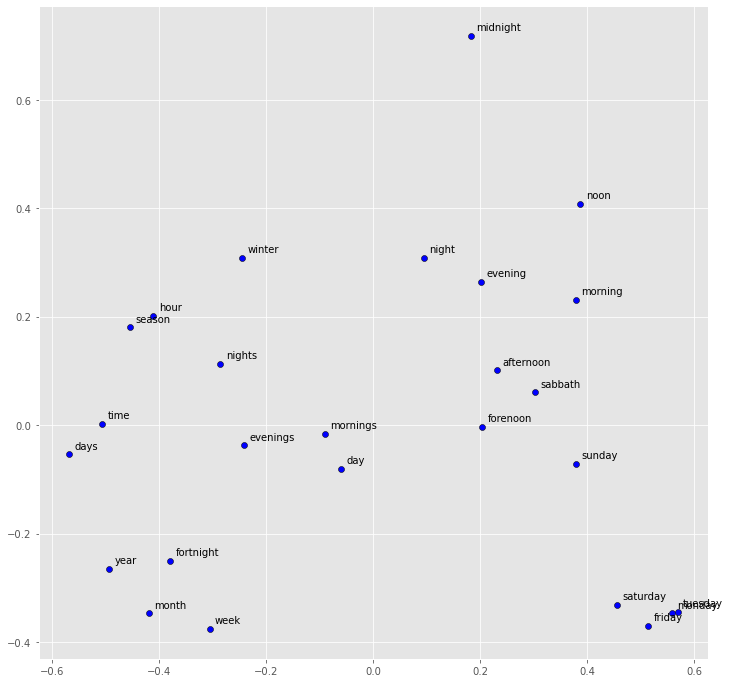

In [493]:
display_pca_scatterplot(vectors, words = test)

In [511]:
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE

def display_tsne_scatterplot_3D(model, user_input=None, words=None, label=None, color_map=None, perplexity = 1, learning_rate = 1, iteration = 500, topn=5, sample=10):

    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    
    word_vectors = np.array([model[w] for w in words])
    
    three_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:2]


    # For 2D, change the three_dim variable into something like two_dim like the following:
    # two_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:2]

    data = []


    count = 0
    for i in range (len(user_input)):

                trace = go.Scatter(
                    x = three_dim[count:count+topn,0], 
                    y = three_dim[count:count+topn,1],  
#                    z = three_dim[count:count+topn,2],
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 0.8,
                        'color': 2
                    }
       
                )
                
                # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
                # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
                data.append(trace)
                count = count+topn

    trace_input = go.Scatter(
                    x = three_dim[count:,0], 
                    y = three_dim[count:,1],  
#                    z = three_dim[count:,2],
                    text = words[count:],
                    name = 'input words',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )

    # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable.  Also, instead of using
    # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
    data.append(trace_input)
    
# Configure the layout

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()

In [512]:
display_tsne_scatterplot_3D(vectors, user_input = ['coffee', 'tea'])